In [170]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


#Loading Working Data - https://www.kaggle.com/ronitf/heart-disease-uci
df = pd.read_csv('/Users/Kevin/Files/Thinkful/Data Files/ESSdata_Thinkful.txt')

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8594 entries, 0 to 8593
Data columns (total 13 columns):
cntry      8594 non-null object
idno       8594 non-null float64
year       8594 non-null int64
tvtot      8586 non-null float64
ppltrst    8580 non-null float64
pplfair    8555 non-null float64
pplhlp     8569 non-null float64
happy      8563 non-null float64
sclmeet    8579 non-null float64
sclact     8500 non-null float64
gndr       8584 non-null float64
agea       8355 non-null float64
partner    8577 non-null float64
dtypes: float64(11), int64(1), object(1)
memory usage: 872.9+ KB


In [172]:
df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [173]:
df.isna().sum()

cntry        0
idno         0
year         0
tvtot        8
ppltrst     14
pplfair     39
pplhlp      25
happy       31
sclmeet     15
sclact      94
gndr        10
agea       239
partner     17
dtype: int64

In [174]:
df = df.dropna()

# 1. Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.

In [175]:
q1 = df.groupby('year')['ppltrst'].mean()

print(q1)

year
6    5.578482
7    5.571394
Name: ppltrst, dtype: float64


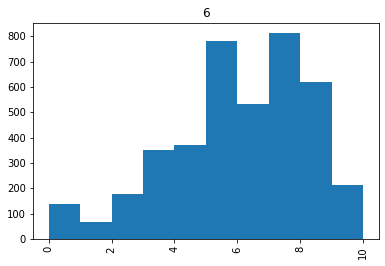

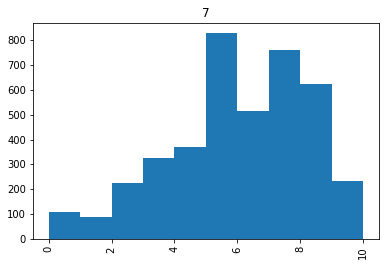

In [176]:
# plot data.
df.groupby('year')['ppltrst'].hist(by = df['year'], sharey=True, sharex=True)
plt.show()

In [177]:
df1 = pd.DataFrame()

ppltrst_2012 = list(df.loc[df['year'] == 6,'ppltrst'])
ppltrst_2014 = list(df.loc[df['year'] == 7,'ppltrst'])

# creating even lentgh lists. taking the shortest list and truncating longer list
if len(ppltrst_2012) < len(ppltrst_2014):
    short_list = len(ppltrst_2012)
else:
    short_list = len(ppltrst_2014)
    
ppltrst_2012 = ppltrst_2012[:short_list]
ppltrst_2014 = ppltrst_2014[:short_list]

#combining data into dataframe
df1['2012'] = ppltrst_2012
df1['2014'] = ppltrst_2014

#calculating comparision test
F, p = stats.ttest_rel(
    df1['2012'],
    df1['2014']
    )

# The F statistic.
print('F Statistic:', F)

# The p-value
print('P-Value:', p)


#paired t test
# comparing data, with users from the same group, two groups

F Statistic: 0.15797212748857214
P-Value: 0.8744865987427111


People did not became less trusting from 2012 to 2014, since the p-value of 0.87 is not < 0.05

# 2. Did people become happier from 2012 to 2014? Compute results for each country in the sample.

In [178]:
q2 = df.groupby(['year','cntry'])['happy'].mean()

print(q2)

year  cntry
6     CH       8.083333
      CZ       6.790349
      DE       7.307692
      ES       7.557858
      NO       8.252825
      SE       7.901048
7     CH       8.142665
      CZ       6.922442
      DE       7.857143
      ES       7.450617
      NO       7.919944
      SE       7.938870
Name: happy, dtype: float64


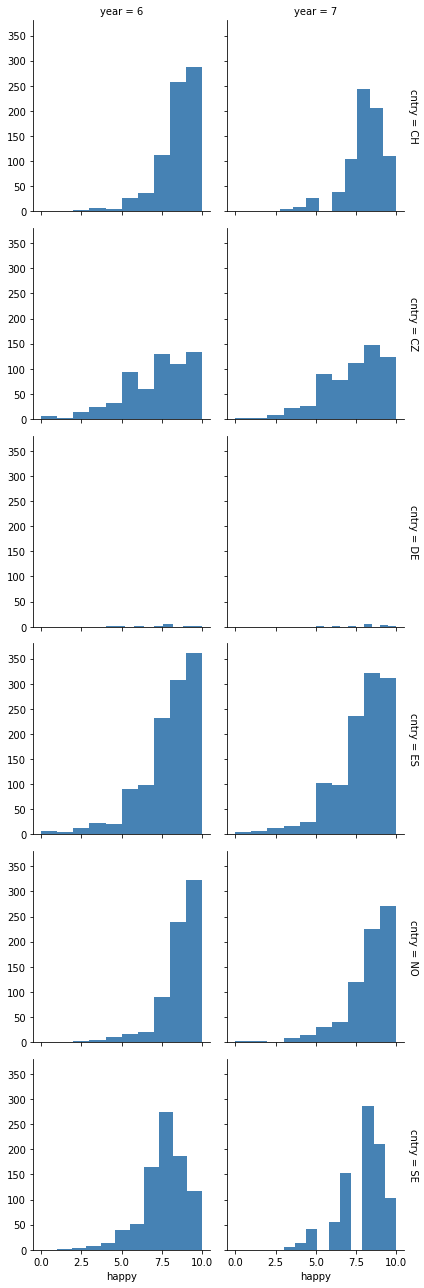

In [179]:
g = sns.FacetGrid(df,
                  row="cntry",
                  col="year",
                  margin_titles=True
                 )

g.map(plt.hist,
      "happy",
      color="steelblue",
     )

In [186]:
#paired t test
# comparing data, with users from the same group, two groups

#creating dataframes
df2_CH = pd.DataFrame()
df2_CZ = pd.DataFrame()
df2_DE = pd.DataFrame()
df2_ES = pd.DataFrame()
df2_NO = pd.DataFrame()
df2_SE = pd.DataFrame()

#CH
happy_CH_2012 = list(df.loc[(df['year'] == 6) & (df['cntry'] == 'CH'),'happy'])
happy_CH_2014 = list(df.loc[(df['year'] == 7) & (df['cntry'] == 'CH'),'happy'])
#CZ
happy_CZ_2012 = list(df.loc[(df['year'] == 6) & (df['cntry'] == 'CZ'),'happy'])
happy_CZ_2014 = list(df.loc[(df['year'] == 7) & (df['cntry'] == 'CZ'),'happy'])
#DE
happy_DE_2012 = list(df.loc[(df['year'] == 6) & (df['cntry'] == 'DE'),'happy'])
happy_DE_2014 = list(df.loc[(df['year'] == 7) & (df['cntry'] == 'DE'),'happy'])
#ES
happy_ES_2012 = list(df.loc[(df['year'] == 6) & (df['cntry'] == 'ES'),'happy'])
happy_ES_2014 = list(df.loc[(df['year'] == 7) & (df['cntry'] == 'ES'),'happy'])
#NO
happy_NO_2012 = list(df.loc[(df['year'] == 6) & (df['cntry'] == 'NO'),'happy'])
happy_NO_2014 = list(df.loc[(df['year'] == 7) & (df['cntry'] == 'NO'),'happy'])
#SE
happy_SE_2012 = list(df.loc[(df['year'] == 6) & (df['cntry'] == 'SE'),'happy'])
happy_SE_2014 = list(df.loc[(df['year'] == 7) & (df['cntry'] == 'SE'),'happy'])

# creating even lentgh lists. taking the shortest list and truncating longer list
def even_list(list_1, list_2):
    if len(list_1) < len(list_2):
        short_list = len(list_1)
    else:
        short_list = len(list_2)
    
    list_1 = list_1[:short_list]
    list_2 = list_2[:short_list]
    
    return list_1, list_2


happy_CH_2012, happy_CH_2014 = even_list(happy_CH_2012, happy_CH_2014)
happy_CZ_2012, happy_CZ_2014 = even_list(happy_CZ_2012, happy_CZ_2014)
happy_DE_2012, happy_DE_2014 = even_list(happy_DE_2012, happy_DE_2014)
happy_ES_2012, happy_ES_2014 = even_list(happy_ES_2012, happy_ES_2014)
happy_NO_2012, happy_NO_2014 = even_list(happy_NO_2012, happy_NO_2014)
happy_SE_2012, happy_SE_2014 = even_list(happy_SE_2012, happy_SE_2014)

#combining data into dataframe
df2_CH['2012'] = happy_CH_2012
df2_CH['2014'] = happy_CH_2014
df2_CZ['2012'] = happy_CZ_2012
df2_CZ['2014'] = happy_CZ_2014
df2_DE['2012'] = happy_DE_2012
df2_DE['2014'] = happy_DE_2014
df2_ES['2012'] = happy_ES_2012
df2_ES['2014'] = happy_ES_2014
df2_NO['2012'] = happy_NO_2012
df2_NO['2014'] = happy_NO_2014
df2_SE['2012'] = happy_SE_2012
df2_SE['2014'] = happy_SE_2014

#calculating comparision test
F_CH, p_CH = stats.ttest_rel(df2_CH['2012'], df2_CH['2014'])
F_CZ, p_CZ = stats.ttest_rel(df2_CZ['2012'], df2_CZ['2014'])
F_DE, p_DE = stats.ttest_rel(df2_DE['2012'], df2_DE['2014'])
F_ES, p_ES = stats.ttest_rel(df2_ES['2012'], df2_ES['2014'])
F_NO, p_NO = stats.ttest_rel(df2_NO['2012'], df2_NO['2014'])
F_SE, p_SE = stats.ttest_rel(df2_SE['2012'], df2_SE['2014'])

# The F statistic.
print('CH - F Statistic:', F_CH)
print('CZ - F Statistic:', F_CZ)
print('DE - F Statistic:', F_DE)
print('ES - F Statistic:', F_ES)
print('NO - F Statistic:', F_NO)
print('SE - F Statistic:', F_SE)

print('')

# The p-value
print('CH - P-Value:', p_CH)
print('CZ - P-Value:', p_CZ)
print('DE - P-Value:', p_DE)
print('ES - P-Value:', p_ES)
print('NO - P-Value:', p_NO)
print('SE - P-Value:', p_SE)

CH - F Statistic: -0.7800633792362622
CZ - F Statistic: -1.0703576573050146
DE - F Statistic: -0.7030499101780563
ES - F Statistic: 1.3860590934427537
NO - F Statistic: 4.149373860727647
SE - F Statistic: -0.48955055558479654

CH - P-Value: 0.43560606784786937
CZ - P-Value: 0.2848887319230953
DE - P-Value: 0.49543876166584
ES - P-Value: 0.16600158102705556
NO - P-Value: 3.739949572463859e-05
SE - P-Value: 0.6245771053748665


Every country except NO changed their happiness. From the averages we can see that NO became less happy. 

# 3. Who reported watching more TV in 2012, men or women?

In [12]:
q3 = df.groupby(['year','gndr'])['tvtot'].mean()

print(q3)

year  gndr
6     1.0     3.901906
      2.0     3.944393
7     1.0     3.749653
      2.0     3.840395
Name: tvtot, dtype: float64


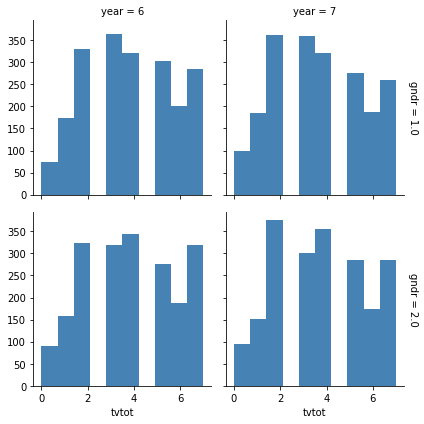

In [188]:
g = sns.FacetGrid(df,
                  row="gndr",
                  col="year",
                  margin_titles=True
                 )

g.map(plt.hist,
      "tvtot",
      color="steelblue",
     )

In [189]:
df3 = pd.DataFrame()

tvtot_M_2012 = list(df.loc[(df['year'] == 6) & (df['gndr'] == 1),'tvtot'])
tvtot_F_2012 = list(df.loc[(df['year'] == 6) & (df['gndr'] == 2),'tvtot'])

# creating even lentgh lists. taking the shortest list and truncating longer list
tvtot_M_2012, tvtot_F_2012 = even_list(tvtot_M_2012, tvtot_F_2012)

#combining data into dataframe
df3['male'] = tvtot_M_2012
df3['female'] = tvtot_F_2012

#calculating comparision test
F, p = stats.ttest_ind(
    df3['male'],
    df3['female']
    )

# The F statistic.
print('F Statistic:', F)

# The p-value
print('P-Value:', p)

#2 sample t test
# comparing data, with users from the different group, two groups

F Statistic: -0.5567477634927981
P-Value: 0.577730662452264


Both men and women reported that they watched the same amount of television in 2012. Since p-value of 0.57 is not < 0.05. 

# 4. Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?

In [13]:
q4 = df.groupby(['year','partner'])['pplfair'].mean()

print(q4)

year  partner
6     1.0        6.080736
      2.0        5.856965
7     1.0        6.046610
      2.0        5.963517
Name: pplfair, dtype: float64


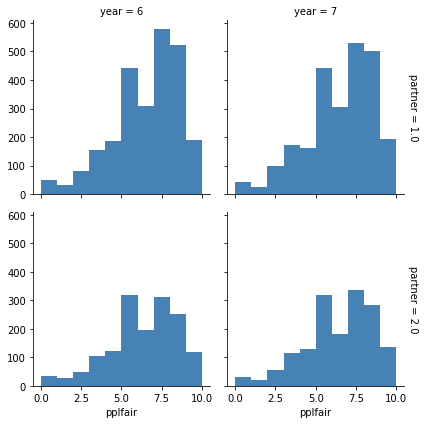

In [190]:
g = sns.FacetGrid(df,
                  row="partner",
                  col="year",
                  margin_titles=True
                 )

g.map(plt.hist,
      "pplfair",
      color="steelblue",
     )

In [191]:
df4 = pd.DataFrame()

pplfair_p1_2012 = list(df.loc[(df['year'] == 6) & (df['partner'] == 1),'pplfair'])
pplfair_p2_2012 = list(df.loc[(df['year'] == 6) & (df['partner'] == 2),'pplfair'])

# creating even lentgh lists. taking the shortest list and truncating longer list
pplfair_p1_2012, pplfair_p2_2012 = even_list(pplfair_p1_2012, pplfair_p2_2012)

#combining data into dataframe
df4['partner'] = pplfair_p1_2012
df4['alone'] = pplfair_p2_2012

#calculating comparision test
F, p = stats.ttest_ind(
    df4['partner'],
    df4['alone']
    )

# The F statistic.
print('F Statistic:', F)

# The p-value
print('P-Value:', p)

#2 sample t test
# comparing data, with users from the different group, two groups

F Statistic: -3.1544268331945524
P-Value: 0.0016237528699586136


People living with a partner believe that people are fair. Since p-value of 0.0016 is < 0.05. 

# 5. Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

In [14]:
q5 = df.groupby(['year','cntry'])['sclmeet'].mean()

print(q5)

year  cntry
6     CH       5.080519
      CZ       4.648855
      DE       5.000000
      ES       5.228737
      NO       5.530780
      SE       5.528115
7     CH       5.160622
      CZ       4.445802
      DE       4.428571
      ES       5.260116
      NO       5.302326
      SE       5.426211
Name: sclmeet, dtype: float64


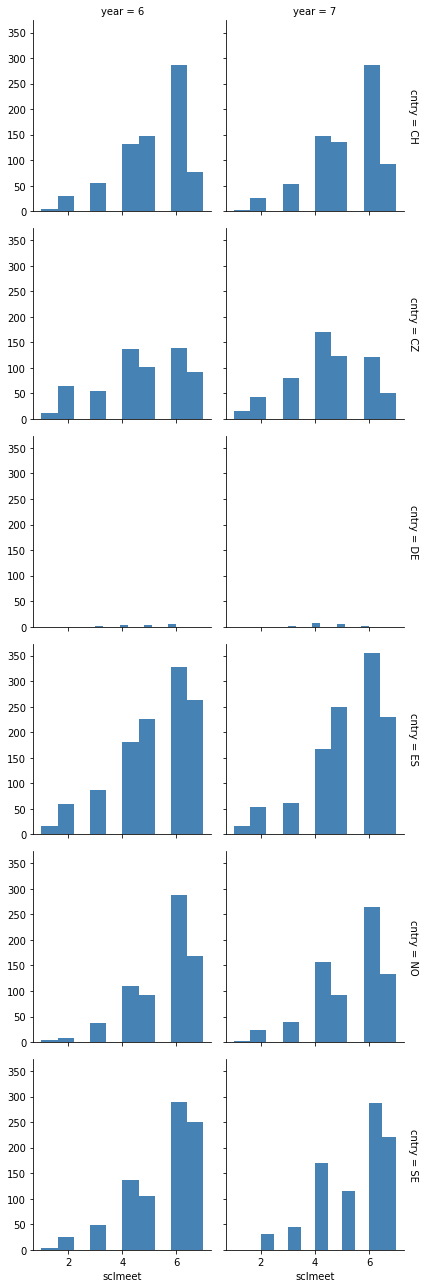

In [192]:
g = sns.FacetGrid(df,
                  row="cntry",
                  col="year",
                  margin_titles=True
                 )

g.map(plt.hist,
      "sclmeet",
      color="steelblue",
     )

In [203]:
df5 = pd.DataFrame()

sclmeet_CH_2014 = list(df.loc[(df['year'] == 7) & (df['cntry'] == 'CH'),'sclmeet'])
sclmeet_CZ_2014 = list(df.loc[(df['year'] == 7) & (df['cntry'] == 'CZ'),'sclmeet'])
sclmeet_ES_2014 = list(df.loc[(df['year'] == 7) & (df['cntry'] == 'ES'),'sclmeet'])
sclmeet_NO_2014 = list(df.loc[(df['year'] == 7) & (df['cntry'] == 'NO'),'sclmeet'])

# creating even lentgh lists. taking the shortest list and truncating longer list
def multi_even_list(list_1, list_2, list_3, list_4):
    short_list = min(len(list_1),len(list_2),len(list_3),len(list_4))
    
    list_1 = list_1[:short_list]
    list_2 = list_2[:short_list]
    list_3 = list_3[:short_list]
    list_4 = list_4[:short_list]
    
    return list_1, list_2, list_3, list_4


# creating even lentgh lists. taking the shortest list and truncating longer list
sclmeet_CH_2014, sclmeet_CZ_2014, sclmeet_ES_2014, sclmeet_NO_2014 = multi_even_list(sclmeet_CH_2014, sclmeet_CZ_2014, sclmeet_ES_2014, sclmeet_NO_2014)

#combining data into dataframe
df5['CH'] = sclmeet_CH_2014
df5['CZ'] = sclmeet_CZ_2014
df5['ES'] = sclmeet_ES_2014
df5['NO'] = sclmeet_NO_2014

#calculating comparision test
F, p = stats.f_oneway(
    df5['CH'],
    df5['CZ']
    ,df5['ES']
    ,df5['NO']
    )

# The F statistic.
print('F Statistic:', F)

# The p-value
print('P-Value:', p)

#ANOVA Test
# comparing data, with users from the different group, more than 3 groups

F Statistic: 51.57170831289908
P-Value: 2.632946728404087e-32


Countries(CH, CZ, ES, NO) in 2014 differed in how often they met socially. Since p-value of 0.0 is < 0.05. The country that stood out was CZ.  

# 6. Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

In [15]:
q6 = df.groupby(['year','cntry'])['sclact'].mean()

print(q6)

year  cntry
6     CH       2.704724
      CZ       2.613354
      DE       2.857143
      ES       2.560266
      NO       2.965565
      SE       2.917960
7     CH       2.781699
      CZ       2.703077
      DE       2.714286
      ES       2.616878
      NO       2.859097
      SE       2.879425
Name: sclact, dtype: float64


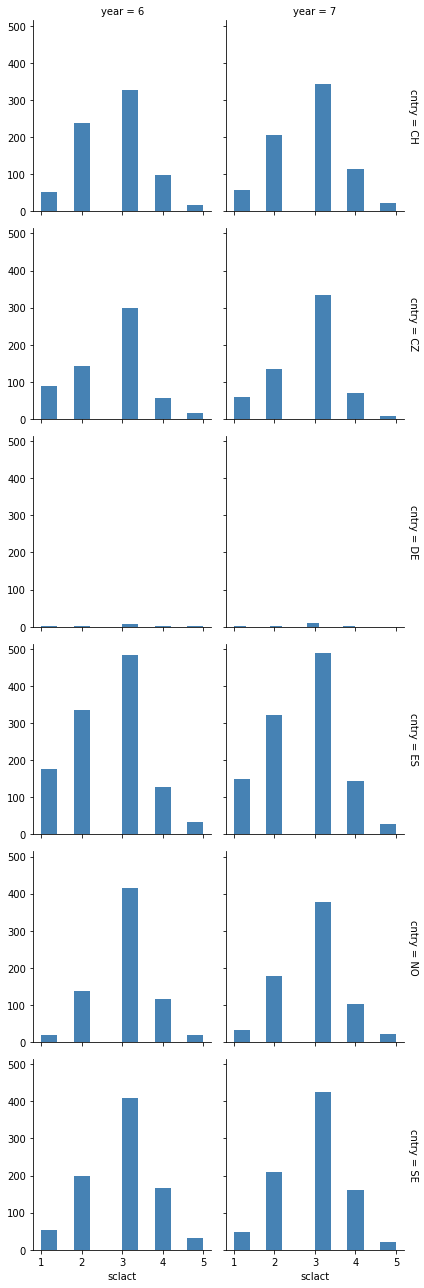

In [204]:
g = sns.FacetGrid(df,
                  row="cntry",
                  col="year",
                  margin_titles=True
                 )

g.map(plt.hist,
      "sclact",
      color="steelblue",
     )

In [213]:
df6 = pd.DataFrame()

sclact_CH_2014 = list(df.loc[(df['year'] == 7) & (df['cntry'] == 'CH'),'sclact'])
sclact_CZ_2014 = list(df.loc[(df['year'] == 7) & (df['cntry'] == 'CZ'),'sclact'])
sclact_ES_2014 = list(df.loc[(df['year'] == 7) & (df['cntry'] == 'ES'),'sclact'])
sclact_NO_2014 = list(df.loc[(df['year'] == 7) & (df['cntry'] == 'NO'),'sclact'])

# creating even lentgh lists. taking the shortest list and truncating longer list
sclact_CH_2014, sclact_CZ_2014, sclact_ES_2014, sclact_NO_2014 = multi_even_list(sclact_CH_2014, sclact_CZ_2014, sclact_ES_2014, sclact_NO_2014)

#combining data into dataframe
df6['CH'] = sclact_CH_2014
df6['CZ'] = sclact_CZ_2014
df6['ES'] = sclact_ES_2014
df6['NO'] = sclact_NO_2014

#calculating comparision test
F, p = stats.f_oneway(
    df6['CH'],
    df6['CZ'],
    df6['ES'],
    df6['NO']
    )

# The F statistic.
print('F Statistic:', F)

# The p-value
print('P-Value:', p)

#ANOVA Test
# comparing data, with users from the different group, more than 3 groups

F Statistic: 9.909240150710145
P-Value: 1.7138102989066455e-06


Countries(CH, CZ, ES, NO) in 2014 differed in how often they took part in social activities, relative to others their age. Since p-value of 0.0 is < 0.05. The country that stood out was ES and NO.  